K-Means CLUSTERING!! - 360DIGITMG

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points. Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
    2. The defined number of iterations has been achieved.

Clustering problem 5:
    Perform clustering on mixed data. Convert the categorical variables to numeric by using dummies or label encoding and 
    perform normalization techniques. The data set consists of details of customers related to their auto insurance. Refer to 
    Autoinsurance.csv dataset.

As a first step towards your solution, we need to understand the data and hence we load the same and the libraries required

In [ ]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

auto = pd.read_csv("AutoInsurance.csv")

In [ ]:
auto

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,2,3.000000,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22.000000,23,24
1,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
4,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,LA72316,California,23405.987980,No,Basic,Bachelor,10-02-2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9131,PK87824,California,3096.511217,Yes,Extended,College,12-02-2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9132,TD14365,California,8163.890428,No,Extended,Bachelor,06-02-2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9133,UP19263,California,7524.442436,No,Extended,College,03-02-2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
# We see the columns in the dataset
auto.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

**Data Description:**
The file Auto_Insurance contains information on customers who have taken up vehicle insurance. 
For each Insured customer the data includes information on their history and on different features that explain the details of the insurance. The goal is to try to identify fraud insurance claim among the lot seeking the various featuers provided.

Customer -- Customer ID

State -- The State the insured customer belongs too

Customer Lifetime Value -- Timeline since the customer is a customer to the insurance company

Response -- 

Coverage -- Category of the coverage provided by the insurance to the insured

Education -- Educational qualification of the Insured

Effective to date -- Till when is the insurance valid

EmploymentStatus -- Employent status of the Insured

Gender - Gender of the Insured

Income - Monthly income of the Insured person

Location Code -- Location code of the person residing at

Marital Status -- Marital status of the Insured

Monthly Premium Auto -- Monthly premium of the Insurance

Months Since Last Claim

Months since Policy Inception -- Months since policy started/ came into action

Number of open complaints -- Open compaints if any

Number of Policies -- Number of policies held by the Insured

Policy Type -- Policy type of the Insurance i.e Personal or Corporate

Policy -- Policy category under type

Renew offer type -- Offer type to renew the insurance selected

Sales Channel -- The channel from where the Insurance was sold or incepted.

Total Claim Amount -- The claim amount allotted for the vehicle insurance

Vehicle Class - Vehicle class

Vehicle Size -- The size of the vehicle

In [ ]:
# As a part of the Data cleansing we check the data for any missing/ na values
auto.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
auto1 = auto.duplicated()
sum(auto1)

0

**Label Encoding the Categorical Features**

Looking at the data we note that we have most of the data in the form of category which needs to be changed to work on.

Hence we do label encoding for the features to encode the labesl within the features

In [ ]:
# Importing the Label Encoder for the job from scikit learn (Try OneHotEncoder function to generate dummy variables for Nominal Data)
from sklearn.preprocessing import LabelEncoder

#creating instance of labelencoder
labelencoder = LabelEncoder()

In [ ]:
# separating the categorical and non in the dataset, which can be concatenated later
x = auto.iloc[:, [1,3,4,5,7,8,10,11,17,18,19,20,22,23]]   #moving columns neede for encoding into x
x.isna().sum()       
y = auto.iloc[:, [0,2,6,9,12,13,14,15,16,21]]     #moving columns which are not needed for encoding into y

In [ ]:
# Createing labels for each column
x['State'] = labelencoder.fit_transform(x['State'])
x['Response'] = labelencoder.fit_transform(x['Response'])
x['Coverage'] = labelencoder.fit_transform(x['Coverage'])
x['Education'] = labelencoder.fit_transform(x['Education'])
x['EmploymentStatus'] = labelencoder.fit_transform(x['EmploymentStatus'])
x['Gender'] = labelencoder.fit_transform(x['Gender'])
x['Location Code'] = labelencoder.fit_transform(x['Location Code'])
x['Policy Type'] = labelencoder.fit_transform(x['Policy Type'])
x['Policy'] = labelencoder.fit_transform(x['Policy'])
x['Renew Offer Type'] = labelencoder.fit_transform(x['Renew Offer Type'])
x['Sales Channel'] = labelencoder.fit_transform(x['Sales Channel'])
x['Marital Status'] = labelencoder.fit_transform(x['Marital Status'])
x['Vehicle Class'] = labelencoder.fit_transform(x['Vehicle Class'])
x['Vehicle Size'] = labelencoder.fit_transform(x['Vehicle Size'])


<ipython-input-8-d0dbd358e5cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['State'] = labelencoder.fit_transform(x['State'])
<ipython-input-8-d0dbd358e5cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Response'] = labelencoder.fit_transform(x['Response'])
<ipython-input-8-d0dbd358e5cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
# label encode y ##
y = pd.DataFrame(y)

In [ ]:
# Concatenate x and y
auto_new = pd.concat([x, y], axis = 1)
auto_new.columns
auto_new.isna().sum()

State                            0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location Code                    0
Marital Status                   0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
Customer                         0
Customer Lifetime Value          0
Effective To Date                0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [ ]:
auto_new.describe()
auto_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9135 non-null   int32  
 1   Response                       9135 non-null   int32  
 2   Coverage                       9135 non-null   int32  
 3   Education                      9135 non-null   int32  
 4   EmploymentStatus               9135 non-null   int32  
 5   Gender                         9135 non-null   int32  
 6   Location Code                  9135 non-null   int32  
 7   Marital Status                 9135 non-null   int32  
 8   Policy Type                    9135 non-null   int32  
 9   Policy                         9135 non-null   int32  
 10  Renew Offer Type               9135 non-null   int32  
 11  Sales Channel                  9135 non-null   int32  
 12  Vehicle Class                  9135 non-null   i

Outlier Treatment!!!

Now we all know that data can have outliers which are the values that may effect the analysis in a big way. 

In other words Outliers are the values that differ from the rest of the data.In order to do so we use the Boxplots, wherein 
we can see the outliers being outshined out of the plot.

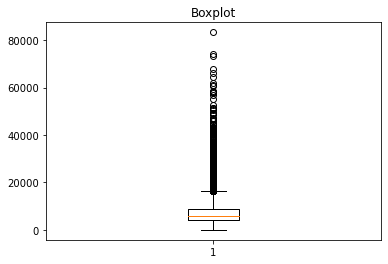

In [ ]:
# We now plot the boxplot for the data using each feature independently and check for Outliers
plt.boxplot(auto_new['Customer Lifetime Value']);plt.title('Boxplot');plt.show()

# We see that there are Outliers present for "Balance" Feature

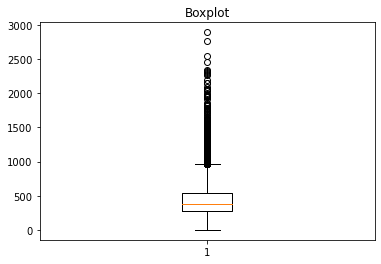

In [ ]:
plt.boxplot(auto_new['Total Claim Amount']);plt.title('Boxplot');plt.show()

# Outliers are present

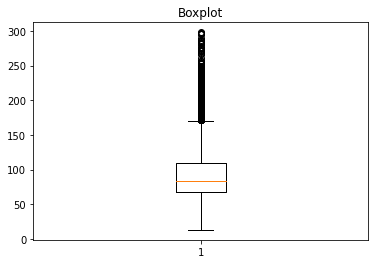

In [ ]:
plt.boxplot(auto_new['Monthly Premium Auto']);plt.title('Boxplot');plt.show()

# Outliers are present

Now in order to deal with the outliers we can use one of "3R Techniques" viz:
       1. Rectify
       2. Retain
       3. Remove

In our example we choose let say to keep or retain the data, but how should we keep outliers in the data and work forward?
We use the Winsorization techniue!!! This technique helps modify the sample distribution of random variables by 
removing the outliers and replacing them with the values that constitute the 5th percentile and 95th percentile values,
i.e, all data below 5th percentile gets replaced with the value of the 5th percentile and all the values above 
95th percentile, with the 95th percentile value.

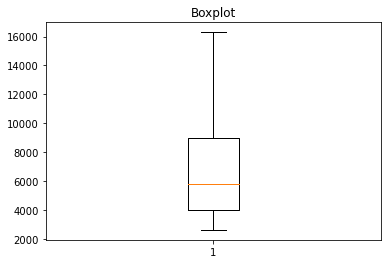

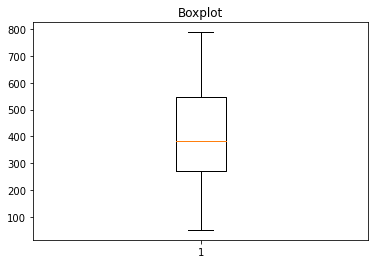

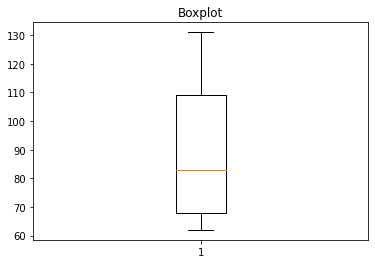

In [ ]:
from scipy.stats.mstats import winsorize

auto_new['Customer Lifetime Value']=winsorize(auto_new['Customer Lifetime Value'],limits=[0.09, 0.091])   
plt.boxplot(auto_new['Customer Lifetime Value']);plt.title('Boxplot');plt.show()

auto_new['Total Claim Amount']=winsorize(auto_new['Total Claim Amount'],limits=[0.05, 0.095])   
plt.boxplot(auto_new['Total Claim Amount']);plt.title('Boxplot');plt.show()

auto_new['Monthly Premium Auto']=winsorize(auto_new['Monthly Premium Auto'],limits=[0.05, 0.095])   
plt.boxplot(auto_new['Monthly Premium Auto']);plt.title('Boxplot');plt.show()

In [ ]:
# Now we check the data for zero variance values
(auto_new == 0).all()   #finding which values contains all zero values


State                            False
Response                         False
Coverage                         False
Education                        False
EmploymentStatus                 False
Gender                           False
Location Code                    False
Marital Status                   False
Policy Type                      False
Policy                           False
Renew Offer Type                 False
Sales Channel                    False
Vehicle Class                    False
Vehicle Size                     False
Customer                         False
Customer Lifetime Value          False
Effective To Date                False
Income                           False
Monthly Premium Auto             False
Months Since Last Claim          False
Months Since Policy Inception    False
Number of Open Complaints        False
Number of Policies               False
Total Claim Amount               False
dtype: bool

In [ ]:
auto_new.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'Customer', 'Customer Lifetime Value', 'Effective To Date', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [ ]:
# We see the data again now to check whether the data is in scale
auto_new.describe

# we notice that the data needs to be normalise, using normalization

<bound method NDFrame.describe of       State  Response  Coverage  Education  EmploymentStatus  Gender  \
0         0         0         0          0                 0       0   
1         5         1         1          1                 2       1   
2         1         1         2          1                 5       1   
3         3         1         3          1                 2       1   
4         2         1         1          1                 5       2   
...     ...       ...       ...        ...               ...     ...   
9130      2         1         1          1                 2       2   
9131      2         2         2          2                 2       1   
9132      2         1         2          1                 5       2   
9133      2         1         2          2                 2       2   
9134      2         1         2          2                 5       2   

      Location Code  Marital Status  Policy Type  Policy  ...  Customer  \
0                 0       

In [ ]:
auto_new = auto_new.drop(['Customer','State','Effective To Date'], axis = 1)

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())/ (i.max() - i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(auto_new.iloc[:,:])
df_norm.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000100,0.000000,0.400000,0.151515,1.0,1.0000,0.000000
1,0.5,0.333333,0.2,0.4,0.5,0.666667,0.666667,0.333333,0.333333,0.25,...,1.000000,0.666667,0.010560,0.562847,0.101449,0.914286,0.050505,0.0,0.0000,0.452196
2,0.5,0.666667,0.2,1.0,0.5,0.666667,1.000000,0.666667,0.666667,0.75,...,0.166667,0.666667,0.318682,0.000000,0.463768,0.371429,0.424242,0.0,0.4375,1.000000
3,0.5,1.000000,0.2,0.4,0.5,0.666667,0.666667,0.666667,0.666667,0.25,...,1.000000,0.666667,0.750453,0.487763,0.666667,0.514286,0.383838,0.0,0.0625,0.699019
4,0.5,0.333333,0.2,1.0,1.0,0.666667,0.666667,0.333333,0.222222,0.25,...,0.666667,0.666667,0.367380,0.000000,0.637681,0.514286,0.656566,0.0,0.3750,0.649303


After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

    1. Centroids of newly formed clusters do not change
    2. Points remain in the same cluster
    3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot. 

In [ ]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[10402.768230635143,
 9564.802314389308,
 8983.621714958588,
 8617.674880691935,
 8387.213171061467,
 8202.876785616123]

Text(0, 0.5, 'total_within_SS')

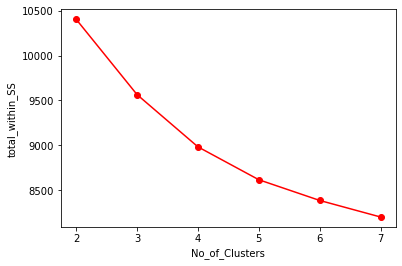

In [ ]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [ ]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [ ]:
model.labels_

array([2, 3, 1, ..., 1, 0, 1])

In [ ]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [ ]:
df_norm['clust'] = mb # creating a  new column and assigning it to new column 

In [ ]:
df_norm.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,...,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,clust
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000100,0.000000,0.400000,0.151515,1.0,1.0000,0.000000,2
1,0.5,0.333333,0.2,0.4,0.5,0.666667,0.666667,0.333333,0.333333,0.25,...,0.666667,0.010560,0.562847,0.101449,0.914286,0.050505,0.0,0.0000,0.452196,3
2,0.5,0.666667,0.2,1.0,0.5,0.666667,1.000000,0.666667,0.666667,0.75,...,0.666667,0.318682,0.000000,0.463768,0.371429,0.424242,0.0,0.4375,1.000000,1
3,0.5,1.000000,0.2,0.4,0.5,0.666667,0.666667,0.666667,0.666667,0.25,...,0.666667,0.750453,0.487763,0.666667,0.514286,0.383838,0.0,0.0625,0.699019,0
4,0.5,0.333333,0.2,1.0,1.0,0.666667,0.666667,0.333333,0.222222,0.25,...,0.666667,0.367380,0.000000,0.637681,0.514286,0.656566,0.0,0.3750,0.649303,1


In [ ]:
#rearranging the features to get the clusters at the first 
auto1 = df_norm.iloc[:,[21,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
auto1.head()

,clust,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000100,0.000000,0.400000,0.151515,1.0,1.0000,0.000000
1,3,0.5,0.333333,0.2,0.4,0.5,0.666667,0.666667,0.333333,0.333333,...,1.000000,0.666667,0.010560,0.562847,0.101449,0.914286,0.050505,0.0,0.0000,0.452196
2,1,0.5,0.666667,0.2,1.0,0.5,0.666667,1.000000,0.666667,0.666667,...,0.166667,0.666667,0.318682,0.000000,0.463768,0.371429,0.424242,0.0,0.4375,1.000000
3,0,0.5,1.000000,0.2,0.4,0.5,0.666667,0.666667,0.666667,0.666667,...,1.000000,0.666667,0.750453,0.487763,0.666667,0.514286,0.383838,0.0,0.0625,0.699019
4,1,0.5,0.333333,0.2,1.0,1.0,0.666667,0.666667,0.333333,0.222222,...,0.666667,0.666667,0.367380,0.000000,0.637681,0.514286,0.656566,0.0,0.3750,0.649303


In [ ]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters

In [ ]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed

df_norm.iloc[:, 0:21].groupby(auto1.clust).mean()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
clust,,,,,,,,,,,,,,,,,,,,,
0,0.585831,0.635634,0.530064,0.521889,0.747048,0.692552,0.693915,0.610203,0.534312,0.448569,...,0.597109,0.708295,0.612593,0.378988,0.833096,0.431880,0.485105,0.021373,0.124007,0.734825
1,0.554120,0.463676,0.492638,0.983715,0.748172,0.664554,0.825288,0.609134,0.533561,0.448927,...,0.439298,0.694133,0.240337,0.012023,0.309047,0.434464,0.499416,0.026115,0.120155,0.613352
2,0.568419,0.451557,0.509275,0.408034,0.743632,0.648705,0.657305,0.609188,0.533058,0.532577,...,0.166776,0.693447,0.237276,0.519729,0.180814,0.430074,0.481520,0.025657,0.126388,0.308392
3,0.579121,0.425641,0.510330,0.409780,0.740934,0.632601,0.671429,0.604945,0.530830,0.527335,...,0.921245,0.689744,0.266337,0.543778,0.319127,0.429294,0.476812,0.022665,0.119196,0.324386


We can now clearly see the 4 number of clusters formed, which can be described as under

  1. Cluster 4 = "3" = Defines the group of Insured people with high income and less prone to a fraud transaction for sure.
    
  2. Cluster 3 = "2" = Defines the group of Insured people who are midway between the two extremes and are the ones that might or might not give a fraud claim, but this cannot really be interpreted clearly.
    
  3. Cluster 1 = "0" = Defines the group of Insured people who are the ones who have lower income and might be bent towards a fraud transaction.
    
  4. Cluster 2 = "1" = Defines the group of Insured people who are the ones who have lowest income and are prone to the fraud transactions, also seeking this they might be the customers that cause huge loss to the company.    